<a href="https://colab.research.google.com/github/seanrote/neural_networks/blob/master/imageclasslstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from tensorflow.keras.layers import Dense, Flatten, Input, SimpleRNN, GRU, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [4]:
#using mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train shape:", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)


In [7]:
#build model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [8]:
model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
#fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 21s 6ms/step - loss: 0.3322 - accuracy: 0.8946 - val_loss: 0.1214 - val_accuracy: 0.9629
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1043 - accuracy: 0.9683 - val_loss: 0.0849 - val_accuracy: 0.9730
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0721 - accuracy: 0.9790 - val_loss: 0.0725 - val_accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0564 - accuracy: 0.9834 - val_loss: 0.0628 - val_accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.0552 - val_accuracy: 0.9820
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0372 - accuracy: 0.9884 - val_loss: 0.0474 - val_accuracy: 0.9855
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0538 - val_ac

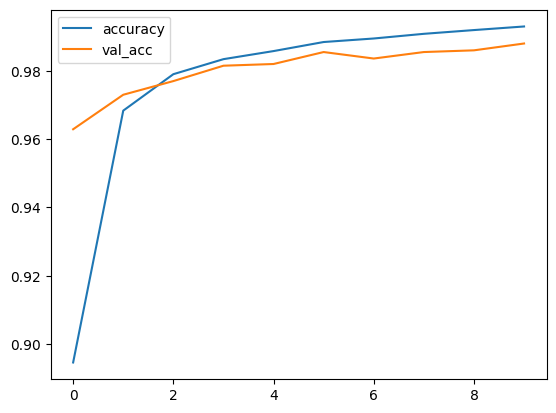

In [10]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

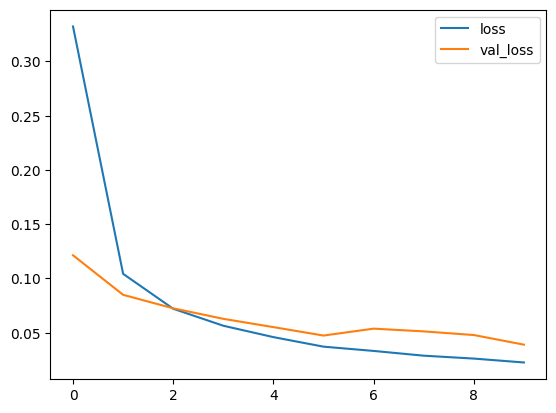

In [13]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()